# Python -- 截取x-y网格区域

本次代码实现的主要内容是读取 NetCDF 格式的x-y网格-数据，并在特定的经纬度范围内进行切片处理，最后使用 Basemap 库进行绘图。具体步骤如下：

- 导入必要的库：包括 xarray 用于读取 NetCDF 数据，matplotlib 用于绘图，numpy 用于数值计算，cartopy 和 Basemap 用于地理绘图。
- 读取数据：从指定路径读取 NetCDF 文件，并提取其中的纬度、经度和热含量数据。
- 数据切片：根据指定的经纬度范围，提取相应区域的数据。
- 绘图设置：设置字体和图形参数，确保绘图的美观性和一致性。
- 绘制地图：使用 Basemap 库绘制底图，并在地图上绘制热含量数据的伪彩色图。
- 添加颜色条：为图像添加颜色条，并设置颜色条的标签和刻度字体大小。
- 显示图像：调整图形布局并显示最终的图像。

## 数据获取

相关测试数据放到以下路径中
- https://github.com/Blissful-Jasper/jianpu_record/tree/main/test_data

<xarray.Dataset> Size: 18MB
Dimensions:       (time_counter: 1, y: 1021, x: 1442)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 8B 1980-01-16
    nav_lon       (y, x) float32 6MB ...
    nav_lat       (y, x) float32 6MB ...
Dimensions without coordinates: y, x
Data variables:
    sohtc300      (time_counter, y, x) float32 6MB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.4
    source:       ORAS5 - backward extension (ECMWF)
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    title:        Monthly mean 2D fields
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...
    history:      Tue Jun 04 12:48:07 2024: cdo sellonlatbox,0,360,90,-90 soh...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...
(array([324, 324, 324, ..., 685, 685

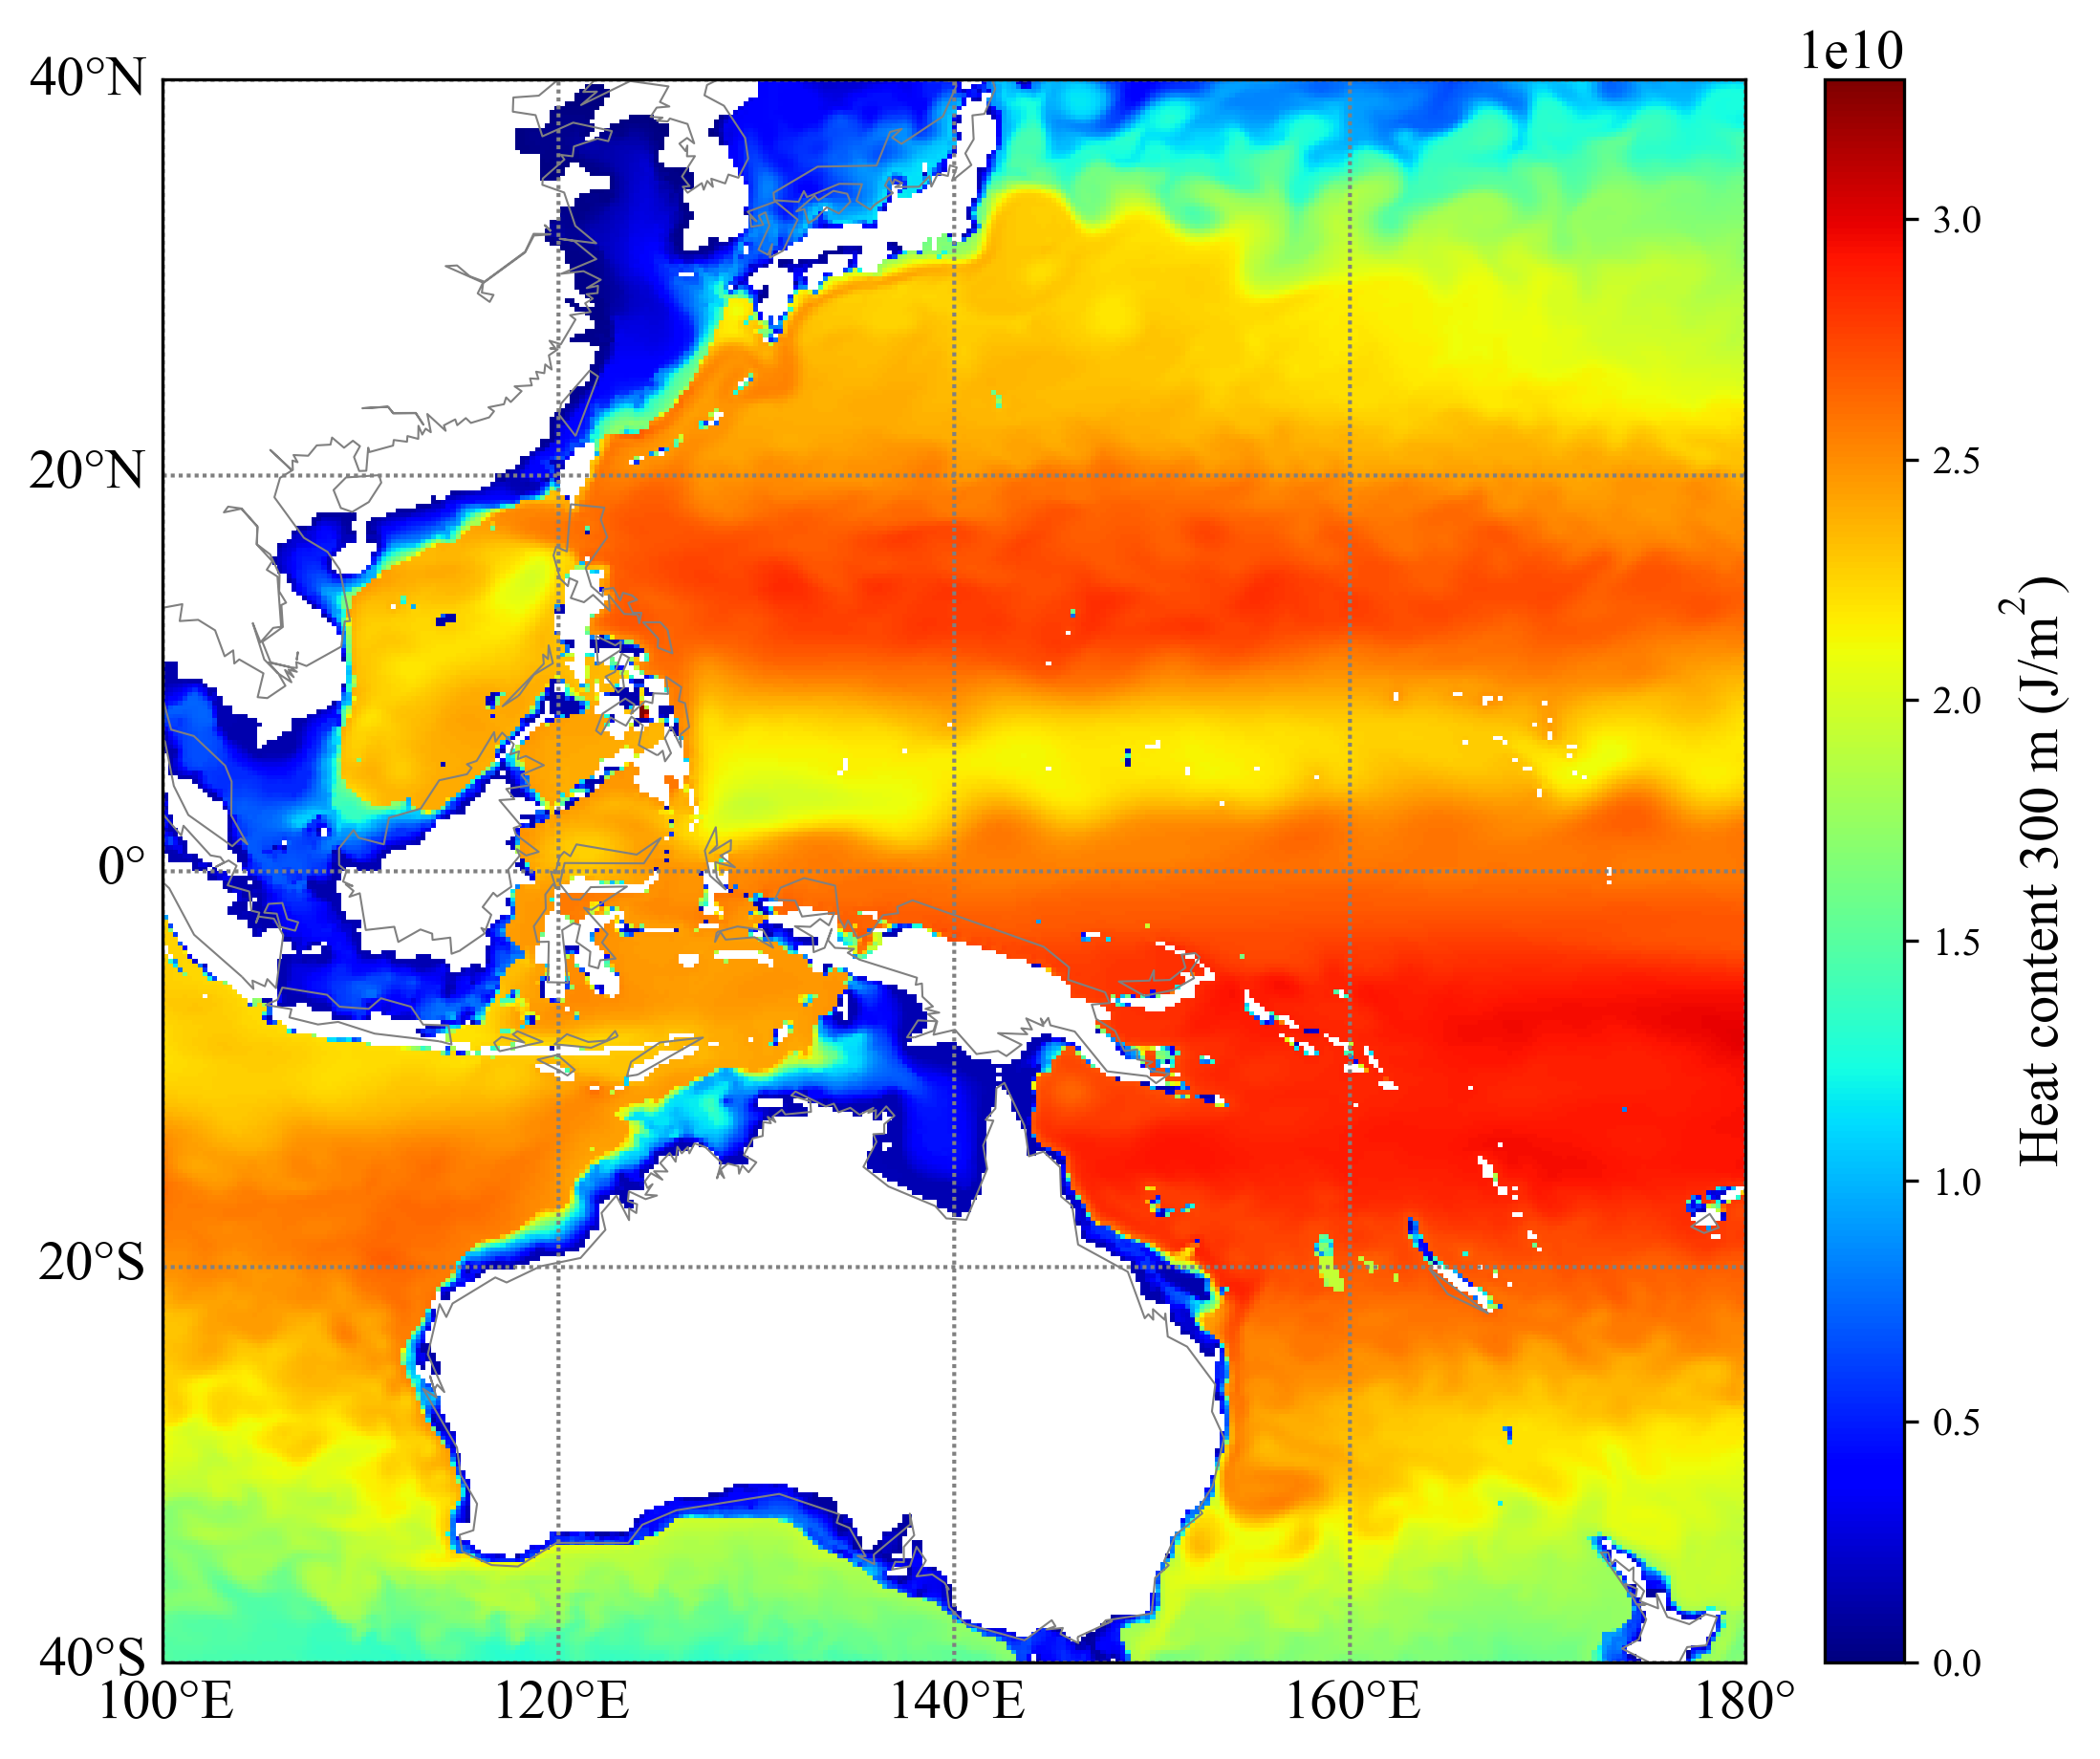

In [11]:
"""
Created on %(date)s

@author: jianpu

@email : xianpuji@hhu.edu.cn

"""
import matplotlib.ticker as ticker
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap 
import os
from datetime import datetime, timedelta
import cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap

# 从文件路径读取数据
path = r'I:/heat.nc'

# 使用 xarray 打开 NetCDF 数据集
data = xr.open_dataset(path)

# 打印数据集的基本信息
print(data)

# 提取纬度和经度数据
lat = data.nav_lat.data
lon = data.nav_lon.data

# 提取特定时间步长的变量数据
data = data.sohtc300[0]



# 定义经度和纬度范围
Area = [100, 180, -40, 40]  # 经度范围 [0, 1] 和 纬度范围 [2,  3]


def slice_region(Area,data,lat,lon):
    
    # 查找经纬度范围内的数据点的索引
    rows_cols = np.where( (lat > Area[2]) & (lat< Area[3]) & (lon > Area[0]) & (lon< Area[1]) ) 
    
    print(rows_cols)
    
    r1 = np.min(rows_cols[0][:]); r2 = np.max(rows_cols[0][:])  
    c1 = np.min(rows_cols[1][:]); c2 = np.max(rows_cols[1][:])
    lats  = lat[r1:r2+1, c1:c2+1]  
    lons  = lon[r1:r2+1, c1:c2+1]  
    data_s = data[r1:r2+1, c1:c2+1]

    return lats,lons,data_s


lats,lons,data_s = slice_region(Area, data, lat, lon)

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.family'] = 'Times New Roman'   
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(8,6), dpi=300)
cmap = "jet"

# 计算单元边界
lon_edges = np.linspace(Area[0], Area[1], lons.shape[1] + 1)
lat_edges = np.linspace(Area[2], Area[3], lats.shape[0] + 1)

# 绘制底图
map = Basemap(projection='cyl', lon_0=0, llcrnrlon=Area[0], llcrnrlat=Area[2], urcrnrlon=Area[1], urcrnrlat=Area[3])
map.drawcoastlines(color='grey', linewidth=0.5)
map.drawparallels(np.linspace(Area[2], Area[3], 5), labels=[1, 0, 0, 0], color='grey')
map.drawmeridians(np.linspace(Area[0], Area[1], 5), labels=[0, 0, 0, 1], color='grey')
mp = map.pcolormesh(lon_edges, lat_edges, data_s, cmap=cmap, shading='auto')

# 添加colorbar
cbar = map.colorbar(mp, location='right', pad="5%")
cbar.set_label('Heat content 300 m (J/m$^2$)')
cbar.ax.yaxis.set_tick_params(labelsize=10)  # 设置colorbar刻度标签的字体大小

# 增加颜色棒、构图调整
fig.subplots_adjust(top=0.98, bottom=0.06, left=0.1, right=0.88)
plt.show()


In [12]:
data

<xarray.DataArray 'sohtc300' (y: 1021, x: 1442)> Size: 6MB
[1472282 values with dtype=float32]
Coordinates:
    time_counter  datetime64[ns] 8B 1980-01-16
    nav_lon       (y, x) float32 6MB 72.75 73.0 73.25 73.5 ... 73.01 73.0 73.0
    nav_lat       (y, x) float32 6MB -77.01 -77.01 -77.01 ... 50.02 50.0 50.0
Dimensions without coordinates: y, x
Attributes:
    standard_name:       Heat content 300 m
    long_name:           Heat content 300 m
    units:               J/m2
    online_operation:    ave(x)
    interval_operation:  1200.0
    interval_write:      2678400.0
    offline_operation:   ave(x)